In [8]:
%config IPCompleter.greedy=True

# Reconocimiento de dígitos con KNN

Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [46]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /usr/bin/python (found version "3.6.9") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/zarthaxx/Desktop/metnum-tp2
CMake Warning (dev) at CMakeLists.txt:58 (add_executable):

In [47]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum


/home/zarthaxx/Desktop/metnum-tp2/notebooks
Python 3.6.9


In [52]:
import pandas as pd

df = pd.DataFrame({'epsilon': pd.Series([], dtype='float'),
                   'time': pd.Series([], dtype='float'),
                   'error': pd.Series([], dtype='float')})

In [53]:
import numpy as np
import time

MATRIX_SZ = 28*28
N = 30
EPS = -1
EPS_N = 10

results = []
epsilons = [10 ** -(EPS+i) for i in range(1,EPS_N+1)]

diag = np.arange(MATRIX_SZ,0,step = -1)

diag_matrix = np.diag(diag)

diag_matrix

print("Diagonal\n", diag[:N])
for eps in epsilons:
    
    t = time.process_time()
    vals, vecs = metnum.get_first_eigenvalues(diag_matrix, N, epsilon=eps)
    elapsed_time = time.process_time() - t
    error = 1-np.sum(np.divide(vals, diag[:N]))/N
    #df.append({"epsilon": 1, "time": 2,"error": 3}, ignore_index=True)
    df = df.append({"epsilon" : eps, "time": elapsed_time, "error": error}, ignore_index=True)
    
    print(f"eps={eps} => [time=","{:.10f}".format(elapsed_time),"err=","{:.10f}".format(error),"]")
    print(vals)

Diagonal
 [784 783 782 781 780 779 778 777 776 775 774 773 772 771 770 769 768 767
 766 765 764 763 762 761 760 759 758 757 756 755]
eps=1 => [time= 2.8947659070 err= 0.4219098898 ]
[ 652.13199882  546.97288983  508.81683758  599.65910272  563.4187916
  587.25448562  627.13546084  613.386422    647.55510496  551.67202728
  636.25953994  598.529235    575.46488222  432.50730131 -841.57368968
  364.2345446   355.41719383  545.27618519  528.54132767  673.48517549
  603.48072663  621.57389043  552.71222405  485.21772746  409.95710222
 -877.65221239  392.10366244  341.72268825  507.64095488  571.97994838]
eps=0.1 => [time= 0.3279585350 err= 0.0768510513 ]
[727.85510207 708.6177757  704.24179778 703.12657784 715.19944801
 703.0352708  710.53993828 703.25906021 710.497764   712.42403539
 709.96845023 710.50137395 711.98669674 709.70634215 713.92295504
 712.32645314 705.05652256 708.18223087 716.52903433 707.78560826
 711.25141593 716.96131148 708.28632708 714.11473776 709.289101
 702.4662874 

[None, None]

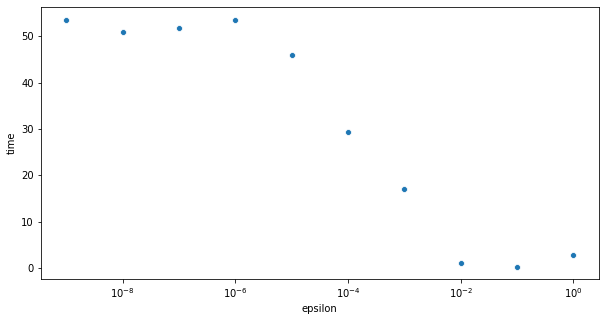

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

eps_time = sns.scatterplot(x="epsilon", y="time", data=df, marker="o")
eps_time.set(xscale="log", yscale="linear")

[None, None]

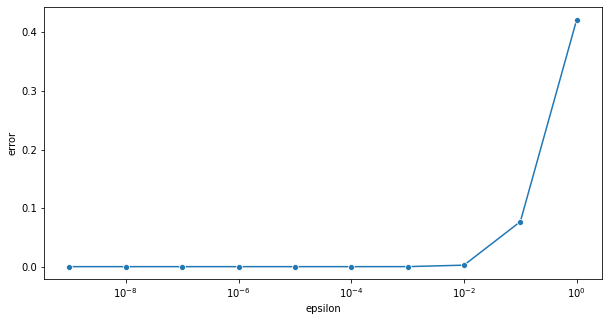

In [55]:

plt.figure(figsize=(10, 5))

eps_error = sns.lineplot(x="epsilon", y="error", data=df, marker="o")
eps_error.set(xscale="log", yscale="linear")
